<a href="https://colab.research.google.com/github/matiasmimc/Tareas-Algoritmos-y-Estructuras-de-Datos/blob/main/Tareas/Tarea1_PilasDeArenaAbelianas_Mat%C3%ADasMiranda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CC3001 Otoño 2023 Tarea 1 [Matías Miranda Cabrera]

# Pilas de arena abelianas

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Introducción
El objetivo de esta tarea es estudiar un problema inspirado en un fenómeno físico, a través de un modelo matemático, el cual si bien es sencillo, produce resultados que presentan una estructura muy interesante.

<img src="https://ivan-sipiran.com/downloads/arena.png" alt= “” width="200">

La idea es que si uno va formando una pila de arena, llega un momento en que se produce un derrumbe, y la arena de esa pila se derrama hacia los lugares vecinos, estos a su vez se pueden derrumbar, y el proceso continúa hasta que finalmente se estabiliza.

Para estudiar este proceso, usaremos un modelo ultra simplificado. Supondremos que la arena se deposita sobre una superficie plana, la cual está dividida en pequeñas celdas cuadradas, las cuales forman un tablero como se muestra en la siguiente figura:

<img src="https://ivan-sipiran.com/downloads/tablero.png" alt= “” width="100">

El modelo supone que si se apilan demasiados granos de arena en una celda, se produce un derrumbe. En particular, la regla es que si en una celda hay 4 o más granos, se le quitan 4 granos, que se reparten equitativamente hacia las celdas vecinas en los cuatro puntos cardinales.

Para simular este proceso, supondremos que cada celda almacena un número entero, que es la cantidad de granos almacenados en su interior. Aplicando la regla antes descrita (y suponiendo que las celdas que aparecen vacías tienen cero granos), desde la configuración

<img src="https://ivan-sipiran.com/downloads/tablero1.png" alt= “” width="100">

se pasaría a

<img src="https://ivan-sipiran.com/downloads/tablero2.png" alt= “” width="100">

Cuando hay más de una casilla con exceso de granos de arena, la regla se puede aplicar a ellas en cualquier orden y el resultado final es el mismo. Esta propiedad es la que hace que estas pilas de arena se llamen abelianas.

La idea es partir desde una configuración inicial, y luego aplicar esta regla en todos los casilleros que se pueda, hasta que no quede ninguno que tenga 4 o más granos de arena. Esa configuración final la vamos a visualizar asignando un color distinto a cada número de granos.

En particular, nos va a interesar estudiar lo que ocurre cuando la configuración inicial tiene todas las celdas vacías, excepto la del centro, en la cual hay $N$ granos de arena (donde $N$ es un parámetro del problema).

Note que en teoría el tablero es infinito en el sentido que siempre hay espacio para colocar los granos de arena que se van distribuyendo. Para su simulación, usted debe calcular un tamaño del tablero lo suficientemente grande como para estar seguro que ningún grano de arena se salga hacia afuera de los bordes (calcule la máxima área que se puede cubrir con $N$ granos de arena, y después calcule cuan grande debe ser el tablero  para poder contener esa área).

# Tarea

## Parte 1
Usted debe escribir una función en Python llamada ``arena``, tal que dado un valor de $N$, simule el proceso anteriormente descrito hasta que se estabilice. El programa debe contar e imprimir el número total de veces que se aplicó la regla que distribuye granos de arena hacia los vecinos. Además, debe visualizar en la pantalla el tablero resultante, usando los métodos que se describen más adelante.

Por ejemplo, al simular con $N=10000$, la figura que resulta es

<img src="https://ivan-sipiran.com/downloads/tablero3.png" alt= “” width="250">

La idea va a ser ejecutar la función con un valor de $N$ dado por el profesor ($N=128$) y luego con valores crecientes de $N$, hasta el mayor número que pueda alcanzar dentro de un tiempo de ejecución razonable.



Escriba a continuación la definición de su función:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def arena(N):
  l = int(np.sqrt(4*N/np.pi)*0.7)     #para definir el tamaño del tablero
  if l % 2 == 0:                  #hacer que el largo sea par para que la figura quede centrada
    l+=1
  tab = np.zeros((l,l))           #crear tablero
  count = 0                       #conteo de ciclos
  tab[l//2,l//2] = N              #poner la arena en la casilla central
  while np.max(tab) >= 4:         #condición para seguir
    for i in range(len(tab)):     #recorrer filas
      for j in range(len(tab[i])):#recorrer columnas
        if tab[i,j] >= 4:         #condición para hacer un split
          tab[i+1,j] +=1
          tab[i-1,j] +=1
          tab[i,j+1] +=1
          tab[i,j-1] +=1
          tab[i,j] -=4
          count += 1              #añadir un split a la cuenta
  plt.matshow(tab)
  plt.show()
  return "El método se ejecutó "+ str(count) + " veces, en un tablero de " +str(l) + "x" + str(l) + "."


Explique aquí cómo calculó el tamaño que necesita tener el tablero.

Para N granos de arena, considerando un círculo de area N, calculo el largo del tablero como el doble del radio del círculo.

Como $A = N =\pi \cdot rˆ{2}$

Y como D = L = $\frac{r}{2}$

$N =\pi \cdot ({\frac{D}{2}})ˆ{2} $

Entonces,

$D = 4 \cdot \sqrt{\dfrac{N}{\pi}}$

Luego, dado que muchas casillas están ocupadas por más de un grano de arena, añadí un factor de escala **$\lambda = 0.7$**, quedando:

$D = \lambda \cdot 4 \cdot \sqrt{\dfrac{N}{\pi}}$

Ahora ejecute la función para $N=128$:

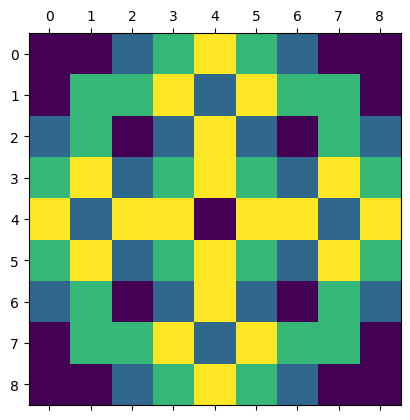

'El método se ejecutó 342 veces, en un tablero de 9x9.'

In [ ]:
arena(128)

A continuación ejecute la función para el valor más grande de $N$ que consiga alcanzar en un tiempo razonable:

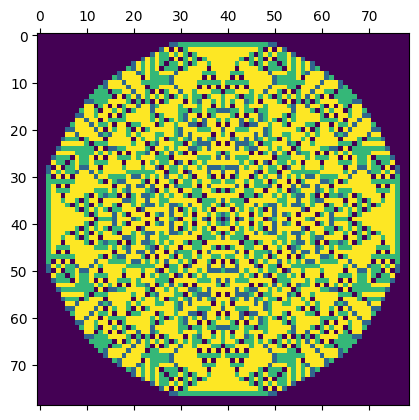

'El método se ejecutó 1830917 veces, en un tablero de 79x79.'

In [ ]:
arena(10000) # reemplace N por el valor máximo que alcanzó a procesar


## Parte 2
Observe que cuando en una celda hay un número grande de granos de arena, es muy ineficiente ir quitándole de 4 en 4, y sería mejor quitar de una sola vez lo más que se pueda. Podemos mejorar nuestro programa si cambiamos la regla de distribución, y decimos que si en una celda hay un número de granos de arena mayor o igual a 4, le quitamos de una sola vez el mayor múltiplo de 4 posible, y todos esos granos lo repartimos equitativamente entre los vecinos de los cuatro puntos cardinales. Escriba una versión modificada de su función de acuerdo a esta nueva regla.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def arena2(N):
  l = int(np.sqrt(4*N/np.pi)*0.7)
  if l % 2 == 0:
    l+=1
  tab = np.zeros((l,l))
  count = 0
  tab[l//2,l//2] = N
  while np.max(tab) >= 4:
    for i in range(len(tab)):
      for j in range(len(tab[i])):
        if tab[i,j] >= 4:
          m = tab[i,j] // 4             #cantidad de veces que se aplica el ciclo en la casilla
          r = tab[i,j] % 4              #cantidad restante en la casilla
          tab[i+1,j] +=m
          tab[i-1,j] +=m
          tab[i,j+1] +=m
          tab[i,j-1] +=m
          tab[i,j] = r
          count += 1
  plt.matshow(tab)
  plt.show()
  return "El método se ejecutó "+ str(count) + " veces, en un tablero de " +str(l) + "x" + str(l) + "."

Ahora ejecute la función para $N=128$:

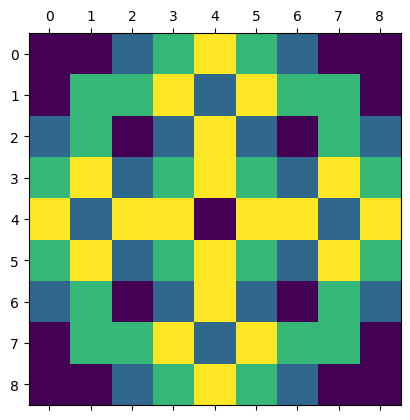

'El método se ejecutó 227 veces, en un tablero de 9x9.'

In [ ]:
arena2(128)

A continuación ejecute la función para el valor más grande de  𝑁  que consiga alcanzar en un tiempo razonable. Note que éste número no necesariamente es el mismo que para la función anterior:

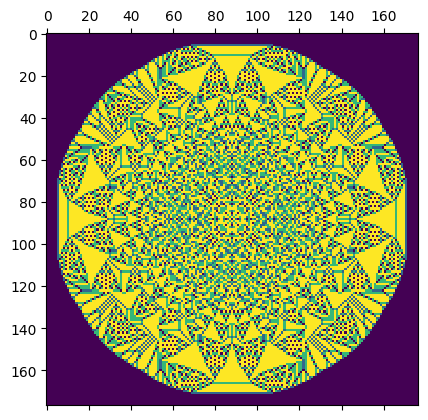

'El método se ejecutó 29393291 veces, en un tablero de 177x177.'

In [ ]:
arena2(50000) # reemplace N por el valor máximo que alcanzó a procesar

## Parte 3
Compare a través de una tabla y un gráfico el número de aplicaciones de la regla que hace el programa en la Parte 1 y el de la Parte 2, para los distintos valores de $N$ que usted haya calculado.

Discuta si valió la pena la optimización y discuta también (pero no implemente) otras posibles optimizaciones que se le ocurran.

In [ ]:
import pandas as pd

df = pd.DataFrame([[342, 0, 227, 0],[18226, 0, 11724, 0],[466188, 11, 307656, 2],[1830917, 35, 1196817, 7],["-","-", 29393291,213]],
                  index=pd.Index(['128', '1000','5000', '10000', '50000']),
                  columns=pd.MultiIndex.from_product([['Método 1', 'Método 2'],['Número de ciclos', 'Tiempo (s)']], names=['Modelo:', 'Granos de arena']))

df.style

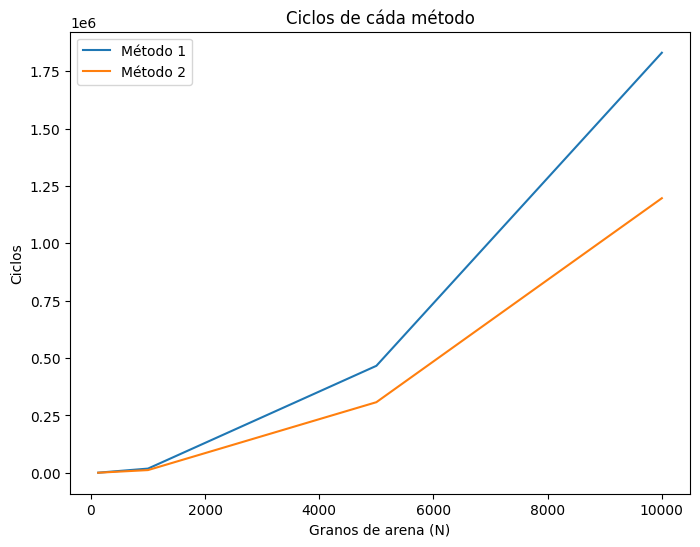

In [ ]:
import matplotlib.pyplot as plt

#tamaño del gráfico
plt.figure(figsize=(8,6))
#ejes
N = [128, 1000, 5000, 10000]
X1 = [342,18226, 466188, 1830917]
X2 = [227, 11724, 307656, 1196817]

plt.plot(N,X1, label="Método 1")
plt.plot(N,X2, label="Método 2")
# nombres de los ejes
plt.xlabel("Granos de arena (N)")
plt.ylabel("Ciclos")
plt.title("Ciclos de cáda método")
plt.legend()
plt.show()

* La optimización valió la pena porque reduce considerablemente la cantidad de ciclos realizados y como consecuencia el tiempo de ejecución, tardando aproximadamente una quinta parte de *arena()*.

* Otra posible forma de optimización sería que el modelo pudiera, tras cada ciclo, revisar solo las casillas que se vieron modificadas, dado que revisa todas las casillas cada ciclo, siendo que hay algunas (como las cercanas a las esquinas), que rara vez cambian.   
